  EDA (Exploratory data analysis) for Bitcoin's opening, closing, high, low, close and 
    adj close dataset for 2017-11-09 upto 2022-10-10

Importing all important modules and libraries

In [1]:
# importing pandas library for reading csv data and generate data frame for data analysis
import pandas as pd
import os,sys
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import Plots as plot

Reading CSV data by using pandas library

In [4]:
df = pd.read_csv("../data/BTC-USD.csv",parse_dates=["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
...,...,...,...,...,...,...,...
1792,2022-10-06,20161.039063,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
1793,2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
1794,2022-10-08,19546.328125,19601.695313,19299.414063,19416.568359,19416.568359,16437423167
1795,2022-10-09,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532


Basic information about Bitcoin's historical data: which gives us information about the dataset
As shown below the dataset contains seven columns with float64 data type except the "Date" column,
which is datetime64.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 7 columns):
Date         1797 non-null datetime64[ns]
Open         1797 non-null float64
High         1797 non-null float64
Low          1797 non-null float64
Close        1797 non-null float64
Adj Close    1797 non-null float64
Volume       1797 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 98.4 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1.797000e+03
mean,20209.010144,20726.487934,19625.310850,20213.028921,20213.028921,2.595338e+10
std,17188.172415,17631.442155,16671.270608,17180.954946,17180.954946,1.977772e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7561.120117,7738.600098,7407.339844,7564.345215,7564.345215,1.035982e+10
50%,10596.948242,10878.500000,10292.386719,10604.406250,10604.406250,2.363511e+10
75%,34254.015625,35228.851563,32697.976563,34235.195313,34235.195313,3.532994e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.shape

(1797, 7)

In [8]:
df.nunique()

Date         1797
Open         1796
High         1796
Low          1797
Close        1796
Adj Close    1796
Volume       1797
dtype: int64

Checking for duplecates: in this dataset there is no duplicate as each row contains daily data.

In [9]:
df.duplicated().sum()

0

As shown below there is no null value in the dataset

In [10]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Visualization of dataset distribution

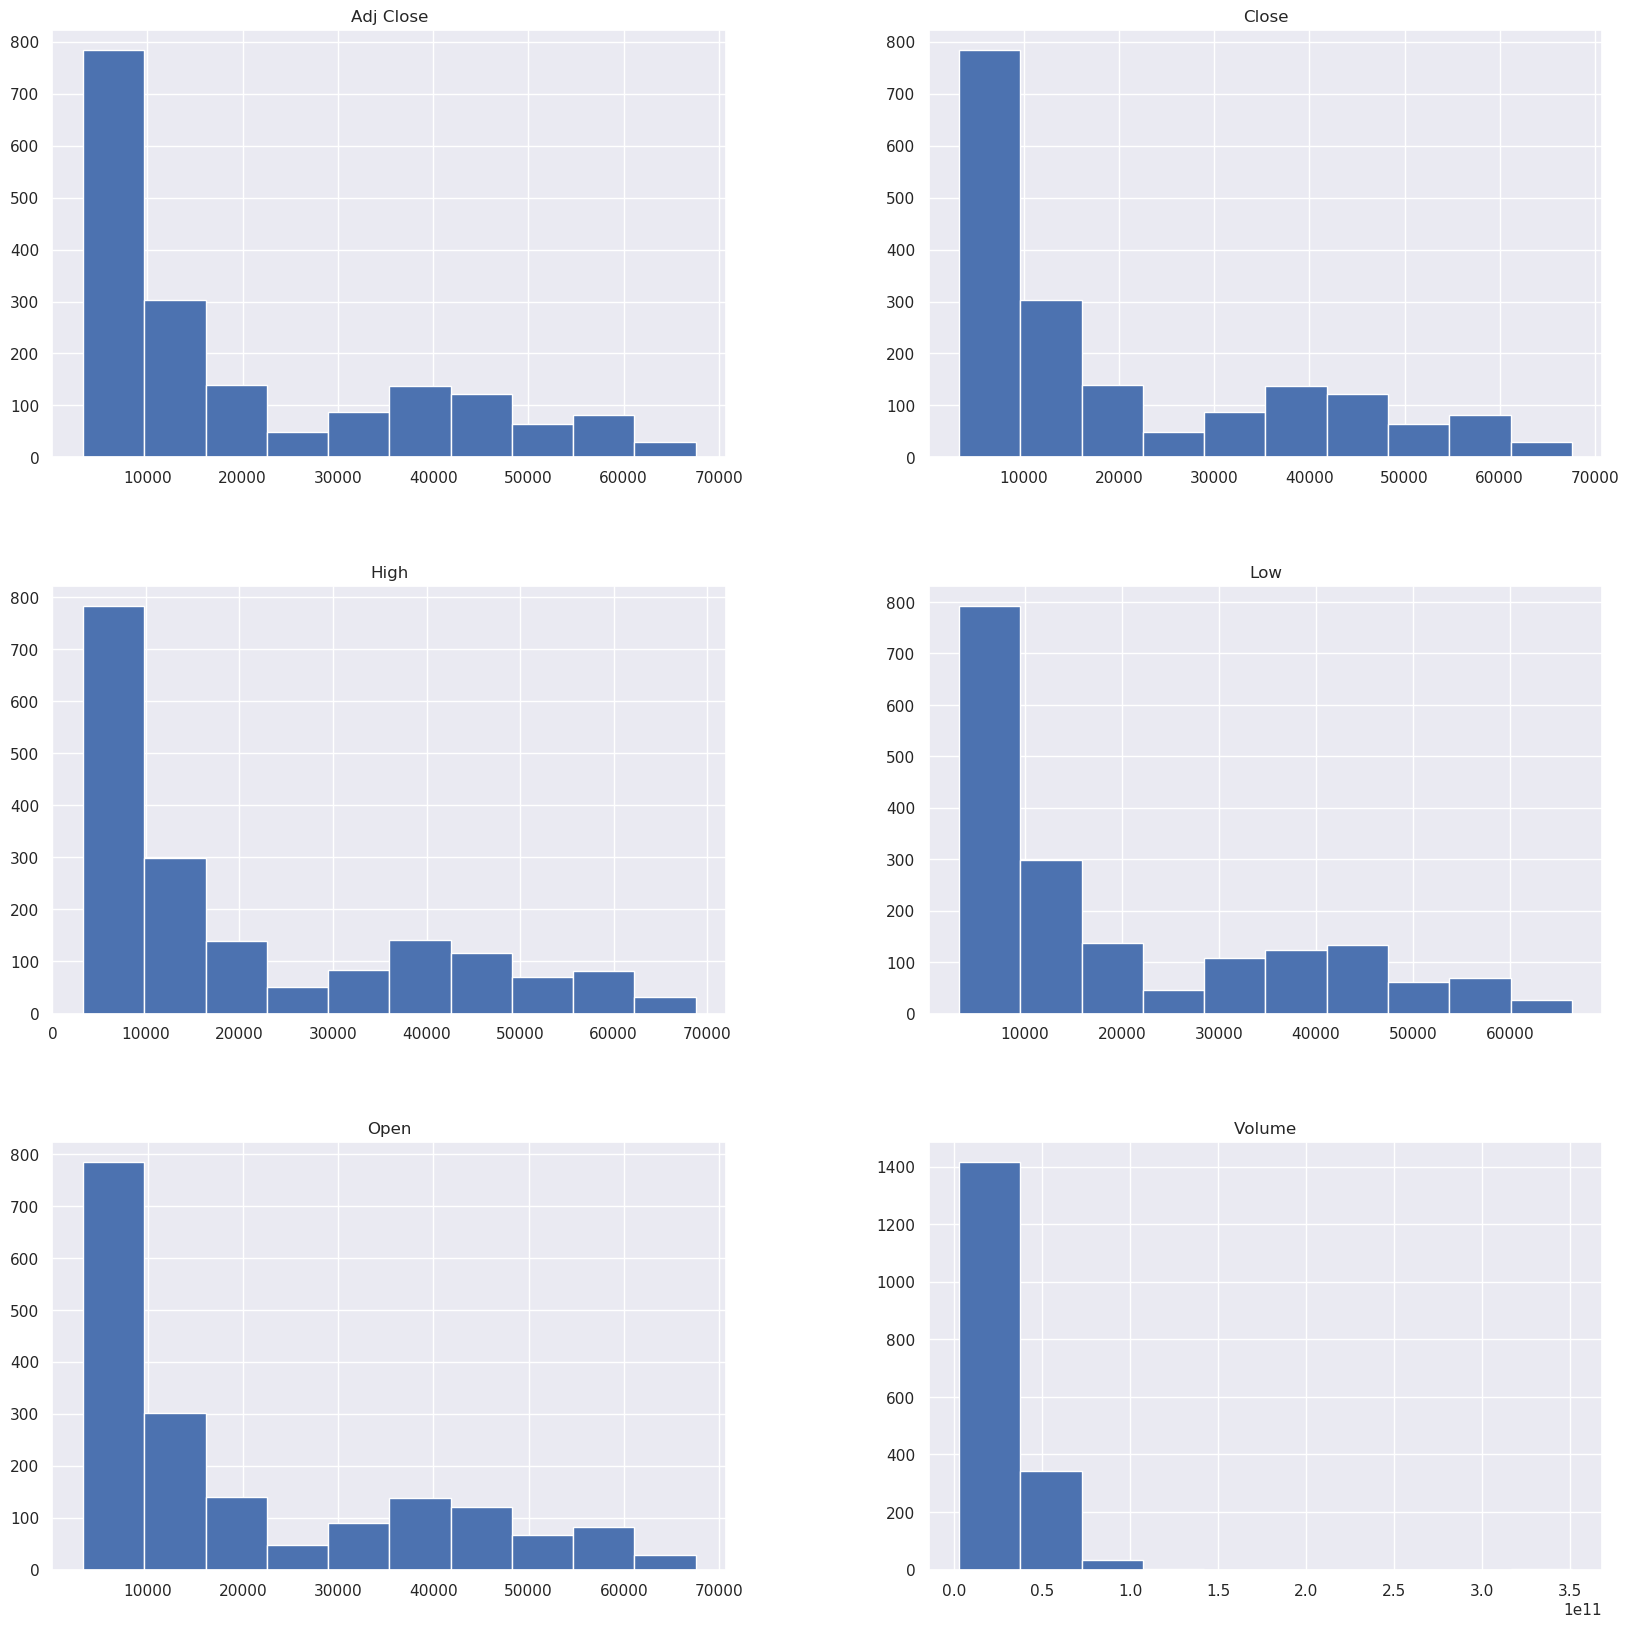

In [12]:
plot.plot_hist_all(df=df)

Data visualisation for the opening and closing price of Amazon trade.

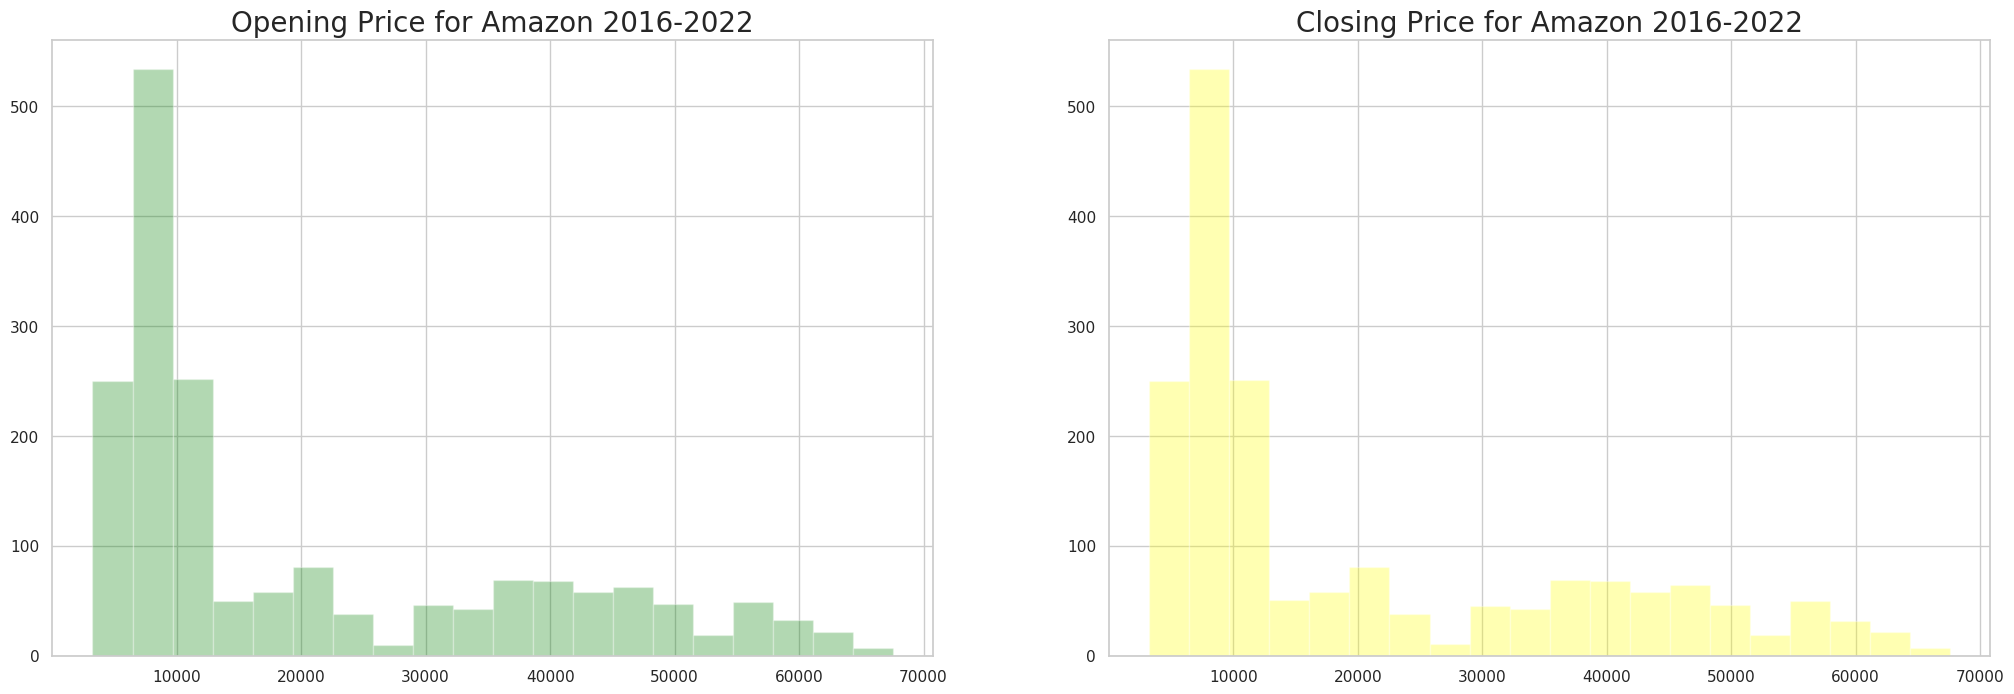

In [13]:
plot.plot_subplots(df['Open'], df['Close'], 'Opening Price for Amazon 2016-2022', 'Closing Price for Amazon 2016-2022')

In [16]:
df[df['Date']=='2016-10-14'].head()

,Date,Open,High,Low,Close,Adj Close,Volume


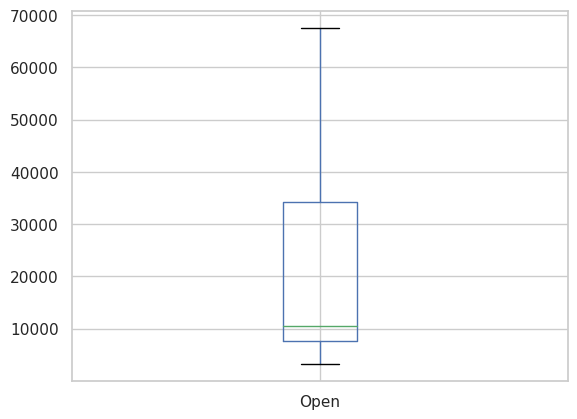

In [15]:
df[['Open']].boxplot()

Correlation plot for dataset
it is used to find the correlation among the variavles. It gives an idea of the correlation strength 
between different variables.

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999290,0.998673,0.998212,0.998212,0.571515
High,0.999290,1.000000,0.998562,0.999209,0.999209,0.577581
Low,0.998673,0.998562,1.000000,0.999077,0.999077,0.558689
Close,0.998212,0.999209,0.999077,1.000000,1.000000,0.569470
Adj Close,0.998212,0.999209,0.999077,1.000000,1.000000,0.569470
Volume,0.571515,0.577581,0.558689,0.569470,0.569470,1.000000


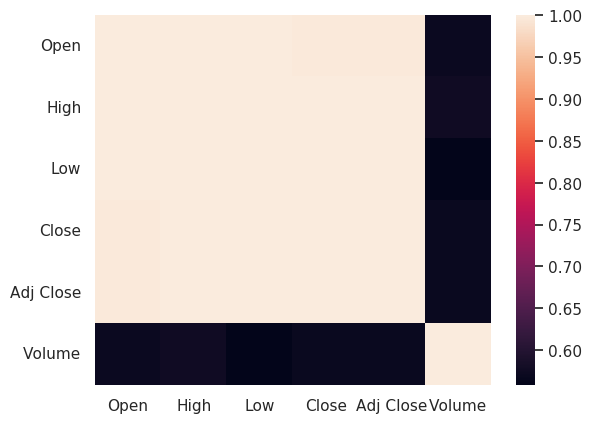

In [18]:
sns.heatmap(df.corr())